# Machine Learning - Regression

## Onderwerpen

1. [Positionering regression modellen](#position_regression)
2. [Wat is `regression`?](#whatsis_regression)
3. [Voorbeelden `regression`](#examples_regression)
4. [Studiemateriaal](#references_regression)
5. [Oefenopdrachten](#assignments_regression)

## Bromateriaal:
- **[VanderPlas]** chapter 5 Machine Learning - sectie __[In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)__ *- gezien op 25 November 2018*

- **[VanderPlas]** chapter 5 Machine Learning - sectie __[Introduction scikit-learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)__, met name de sectie 'Scikit-Learn's Estimator API' *- gezien op 28 November 2018*

<a id="position_regression"></a>
## 1. Positionering regression 

![position_regression_](images/MLOverview_regression.png)

Categorie: **Supervised learning**

### Welke vragen/behoeften lost regression op?

De regressie techniek is een van de fundamentele technieken die ons helpt wanneer er een behoefte is om een numerieke waarde (*target*) te voorspellen, gegeven een verzameling observaties (*features*).

Woorden in de vraagstelling/behoefte zoals 'hoeveelheid', 'hoeveel keer', verwachten een kwantitatief antwoord (*numerical, continous*). 

**Voorbeelden use cases**
- **Detailhandel**: Hoeveel zijn de dagelijkse, maandelijkse en jaarlijkse verkopen voor een bepaalde winkel voor de komende drie jaar?  Hoeveel parkeerplaatsen moeten worden toegewezen voor een winkel?
- **Fabricage** Hoeveel zullen de arbeidskosten zijn voor dit-en-dat product? Hoeveel zullen mijn maandelijkse elektriciteitskosten zijn voor de komende drie jaar?
- **Financieel wereld**: Wat zullen de aandelen prijzen doen de komende 3 maanden? Wat is de kredietwaardigheid van deze klant?
- **Onroerendgoed wereld**: Wat zullen de huizen prijzen doen de komende 6 maanden?
- **Verzekeringen**: Hoeveel klanten zullen een beroep doen op hun verzekeringen het komende verzekeringsjaar?
- **Energiebedrijven**: Wat zal de temperatuur zijn voor de volgende 5 dagen?
- **Agrarische sector**: Wat zal de temperatuur/regen/zonneschijn zijn voor de volgende 5 dagen, 5 maanden,...?

## 2. Wat is regression?<a id="whatsis_regression"></a>

Een **regression analyse** stelt ons in staat om te ontdekken of er een verband is tussen een onafhankelijke variabele (*observaties*) en een afhankelijke variabele (*target*). Resultaten zijn van *kwantitatieve* aard. Het is te gebruiken voor *voorspellingen* en *prognoses*. In dat opzicht is het woord 'regression' wat misleidend, want het kan niets met 'tijd' te maken hebben.

- Het bepaalt hoe de afhankelijke variabele verandert, wanneer de onafhankelijke variabele(n) wijzigen.
- Een **regression model** is het resultaat en houdt in dat de parameters bekend zijn die de relatie vastleggen.
- De relatie tussen de variabelen wordt geformuleerd in de vorm van polynoom functies (n-de orde polynomen, n=1, 2, 3, enz.).

Concreter gezegd aan de hand van het meest eenvoudige regression model: *linear regression*:
- bepaal de beste aanpassing van een (rechte)lijn aan een gegevensverzameling.
- gebruik deze (rechte)lijn om voorspelingen te doen met nieuwe observaties.

Voorbeeld linear regression model: Height = 0.6Weight + 130.2 ![Figuur1](images/linear_regression_heigt_weight.png)

## 3. Voorbeelden  linear regression<a id="examples_regression"></a>

Laten we een aantal gegevens fabriceren die een ruwweg lineair verband weergeven tussen de paginasnelheid en het aankoopbedrag.

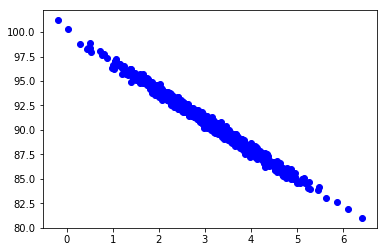

In [1]:
# Voorbeeld voor concept linear regression
# Behoefte/vraagstuk: 
# is er een verband tussen de (web)pagina-snelheid (pagespeed) 
# en het aankoopbedrag (purchaseAmount)?
# Note: willekeurig gegenereerde observaties, later praktijk data

%matplotlib inline
import numpy as np
from pylab import *

# generate distributions
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

# plot purchaseAmount against pageSpeed... 
scatter(pageSpeeds, purchaseAmount, color='b')

Duidelijk is te zien dat er een lineaire relatie is tussen paginasnelheid en het aankoopbedrag. In dit geval nogal voor de hand liggend.

Sinds we slechts twee observaties hebben, houden we het simpel en maken gebruik van `scipy.state.linregress` (uit module `scipy.stats`). Later gaan we **scikit-learn** gebruiken, dat voortbouwt op de module `scipy`.

In [2]:
from scipy import stats

# linear regression model: y = m.x + b  (m=slope, b=interecept)
slope, intercept, r_value, _, _ = stats.linregress(pageSpeeds, purchaseAmount)

# model parameters slope and intercept:
print('slope: {}'.format(slope))
print('intercept: {}'.format(intercept))

slope: -2.9941495302910655
intercept: 99.96648789954918


### Hoe goed is het model?

De **R-squared** is de meest populaire metriek om te evalueren hoe goed het model past bij de gegevens. 

De waarde van de R-squared geeft aan de fractie van de totale variatie in Y (*target*) die wordt vastgelegd door het model.

Het is een waarde tussen 0 en 1; hoe dichter de waarde bij 1, hoe beter de modelkwaliteit. Hoe dichter waarde bij de 0 is, hoe 'slechter' de aanpassing van het model aan de gegevens is.

Berekening R_squared: 
![Figuur1](images/r_squared_calculation.png)
                  
Gelukkig is er een Python functie die r-squared voor ons berekent.

In [87]:
# r-squared value = r_value^2
# not surprisingly, the R-squared value shows a really good fit.
print('r-squared: {}'.format(r_value ** 2))

r-squared: 0.9900995069811002


Laten we de *slope* en de *interceptie* gebruiken, die we van de regressie hebben gekregen, om een grafiek te maken van voorspelde waarden versus observatie waarden:

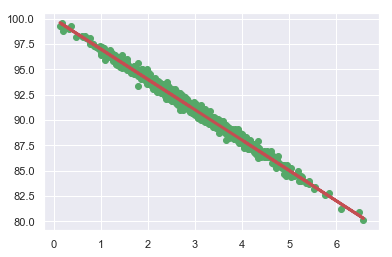

In [88]:
import matplotlib.pyplot as plt

# model prediction function (linear regression):
#   y = slope * x + intercept
def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds) #prediction values

# show observations/features and prediction values
plt.scatter(pageSpeeds, purchaseAmount, color='g')
plt.plot(pageSpeeds, fitLine, c='r', linewidth=3)
plt.show()

### Activiteit

Probeer de willekeurige variatie in de dataset te vergroten en kijk welk effect het heeft op de r-squared waarde.

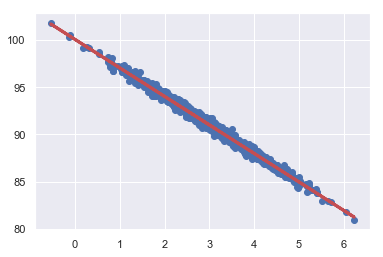

slope: -3.0201580843637545
intercept: 100.07090665864817
r-squared: 0.9899960743292027


In [89]:
# Activity example linear regression pagespeed vs. purchaseAmount

%matplotlib inline
import numpy as np
from pylab import *
from scipy import stats
import matplotlib.pyplot as plt

# generate datasets
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

# calculate the linear regression model
slope, intercept, r_value, _, _ = \
        stats.linregress (pageSpeeds, purchaseAmount)

# prediction function
def predict(x):
    return slope * x + intercept

# generate the prediction line
fitLine = predict(pageSpeeds)

# make plots
plt.scatter(pageSpeeds, purchaseAmount, color='b')
plt.plot(pageSpeeds, fitLine, c='r', linewidth=3)
plt.show()

# print modelparameters
print('slope: {}'.format(slope))
print('intercept: {}'.format(intercept))
print('r-squared: {}'.format(r_value ** 2))

----

### Interpolatie en extrapolatie
Een regression model wordt getraind aan de hand van de aanwezige data (*interpolatie*), en het getrainde model wordt vervolgens gebruikt om een voorspelling/prognose te doen voor de onbekende data (*extrapolatie*).

**Figuur: interpolatie en extrapolatie**
![interpolatie_extrapolatie](images/interpolatie_extrapolatie.png)

NB. Voor de *interpolatie* verdelen we de data set in een **training set**, om het model te trainen, en een **test set** om het model te valideren.

#### Linear regression
Linear regression is een vorm van regressie waarin één variabele (*feature*) gebruikt wordt om de uitkomst van een andere variabele te voorspellen (*target*). 

Dit is erg bruikbaar bij het onderzoeken of er een trend in de data aanwezig is (voorspellingen), en bij **time series  modelling**, bijvoorbeeld, waarbij je de temperaturen over de jaren heen bekijkt of er globale opwarming plaatsvindt.

Wiskundig:  **y = b0 + b1.x + e**<br>
y: afhankelijke variabele, de *target*<br>
x: onafhankelijke variabele (de observatie/*feature*)<br>
b1: hellingshoek van de lijn (*slope*)<br>
b0: interceptie met x=0<br>
e: regression residue<br>

**Figuur: linear regression line**
![LinearRegressionBestFitLine](images/linear_regression_line.png)

#### Least square regression line
Dat  is die lijn door de punten waarbij de som van het kwadraat van de vertikale afstanden tot die lijn minimaal is.

Wiskundig:  **y = b0 + b1.x**<br>
waarbij b1 en b0 worden berekend op grond van minimale afstand tussen een data op de lijn (y) en werkelijke data (yw). y is de *target*.

**Figuur: linear regression least-square line**
![LeastSquareRegressionLine](images/linear_regressing_bestfit_line.png)

### Polynomial Regression
Niet alle verbanden tussen variabelen zijn linear. Er is een vorm van lineaire regressie van hogere orde, gemodelleerd tussen afhankelijke en onafhankelijke variabelen als een n-de graads polynoom. Hoewel het lineair is, past het de lijnen beter aanpassen. In essentie introduceren we hogere-orde variabelen van dezelfde onafhankelijke variabele in de vergelijking.

1. **Linear**: y = m.x + b.  'First-order' of 'first degree' polynomial, want de macht van x is 1.
2. **2de graads polynoom**: y = a.x^2 + b.x + c
3. **3de graads polynoom**: y = a.x^3 + b.x^2 + c.x + d
4. n-de orde polynomen (n>3) ....

Hogere orde polynomen produceren complexere grafieken.
![voorbeeld_2nd_orde_polynomial](images/nth_order_polynomial.png)

#### voorbeeld n-de graads polynomen

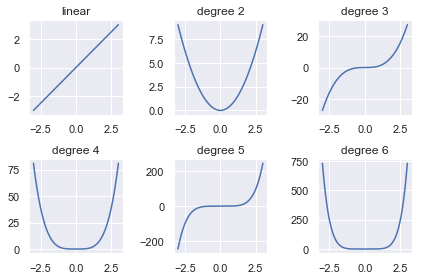

In [90]:
x = np.linspace(-3,3,1000) # 1000 sample numbers between -3 to 3

# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')

plt.tight_layout()# tidy layout

#### Overfitting
Het model past zich 'te goed aan' de dataset. Gebeurd meestal als je een te hoge orde polygoon gebruikt.

- gebruik geen hogere macht dan je nodig hebt.
- visualiseer je data eerst om een beeld te krijgen hoe complex de grafiek zou kunnen worden.
- een grote r-square betekent dat de grafiek goed past bij de gegeven data (*training* data), maar het is geen goede voorspeller.
- gebruik van train/test data is een principiële methode om overfitting te detecteren.

Voorbeeld met `numpy.polyfit()` maaktde berekeningen eenvoudiger m.n. in het geval van overfitting. 

#### Voorbeeld polynomial regression
We nemen een wat realistischer gegevensverzameling van de pagina-snelheden en de aankoopbedragen.

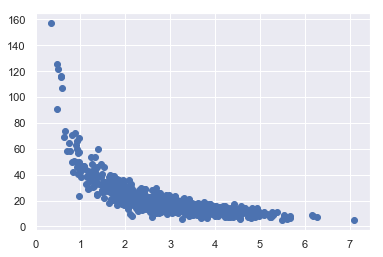

In [91]:
%matplotlib inline
from pylab import *

np.random.seed(2)  # make sure you always start same random dataset
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

De module `numpy` heeft een handige methode `polyfit()` waarmee we een n-de orde polynoom van onze data kunnen maken met minimale foutkwadraten.

In [92]:
# try 4th degree polynomial

x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

We zullen onze oorspronkelijke scatterplot maken, samen met een grafiek van onze voorspelde waarden met behulp van de polynoom voor paginasnelheidstijden van 0-7 seconden.

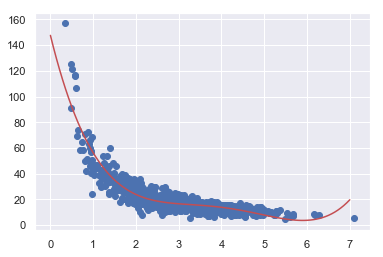

In [93]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Dat ziet er goed uit. We berekenen de r-squared waarde:

In [94]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))
print (r2)

0.8293766396303073


#### Activiteit
Probeer zelf verschillende orde polynomen. Krijg je een betere aanpasing te zien met hogere orde? Wanneer begin je overfitting te zien, zelfs als de r-squared waarde er goed uitziet voor deze dataset?


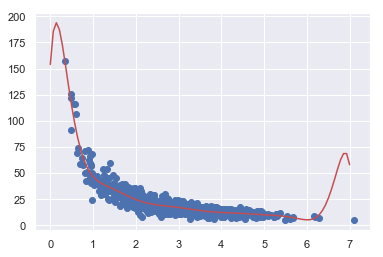

r-squared: 0.8293766396303073


In [95]:
# TODO: try different order polynomials 
#       and see when overfitting takes place

%matplotlib inline
from pylab import *

np.random.seed(2) # make sure you always start same random dataset
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

# polynoom of order n=12...
p12 = np.poly1d(np.polyfit(x, y, 12))

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p12(xp), c='r')
plt.show()

r2 = r2_score(y, p4(x))
print ('r-squared:', r2)

### EXTRA - hoe goed is het model?

De drie meest gebruikte metrieken voor een maatstaf van de modelkwaliteit zijn:
1. **R-kwadraat**
> De R-kwadraat is de meest populaire praktijk om te evalueren hoe goed het model bij de gegevens past. De R-kwadraatwaarde geeft de totale variatie in de afhankelijke variabele aan, die door de onafhankelijke variabele kan worden bepaald. Het is een waarde tussen 0 en 1; hoe dichter de waarde bij 1, hoe beter de modelkwaliteit.
2. **Root Mean Squared Error (RMSE)**
> RMSE geeft aan hoe dicht de voorspelde waarden liggen bij de werkelijke waarden; daarom betekent een lage RMSE-waarde dat de modelkwaliteit goed is. 
3. **Mean Absolute Error (MAE)**
> MAE geeft aan de afwijking hoe ver gemiddeld de modelvoorspelling afwijkt van de werkelijke waarde.<br>
> MAE is het gemiddelde van de absolute waarde van de fouten. Een fout is het verschil tussen werkelijke waarde en voorspelde waarde.<br>
> Ook nu weer betekent een lagere MAE-waarde dat de modelkwaliteit beter is
> Voorbeeld MAE: https://medium.com/@ewuramaminka/mean-absolute-error-mae-sample-calculation-6eed6743838a

De benodigde berekeningen staan in de sub-module `metrics` van de scikit-learn bibliotheek. **Zie oefenopdracht** [Student resultaten en studie-uren](#assignment_grades).

### Multivariate Regression (multiple regression)

Wanneer meer dan één variabele invloed hebben op de variabele (*target*) waarin je geinteresseerd bent, spreekt men van *multivariate regression*.

**Voorbeeld**: het voorspellen van de prijs van een auto op basis van vele attributen, zoals kleur, merk, gereden kilometers, brandstofgebruik, etc.

Regression model gebruikt nog steeds *least squares* methoden.
- coefficienten voor elke factor, 
> bijv. `prijs = a + b.kilometerstand + c.leeftijd + d.aantal_deuren`.<br>
> De factoren a, b, c, d impliceren hoe belangrijk elke factor is.<br>
> *feature-selection* - verwijder datgene wat niet relevant is, bijv. die factoren die een lage coefficient hebben.
- je kan nog steeds de modelaanpassing meten met **R-squared**.
- aanname is dat factoren onderling onafhankelijk van elkaar zijn.

De `statsmodel` module maakt *multivariate regression* wat makkelijker te gebruiken, zoals in het volgende voorbeeld.

**Reference** 
Module `statsmodel` - linear regression: https://www.statsmodels.org/dev/regression.html

#### Voorbeeld multivariate regression

**Use Case**: Hoe hangt de prijs van een auto af van factoren, zoals merk, kilometerstand, aantal deuren, etc.?

**Dataset**: http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls

In [97]:
# grab the small dataset of the Blue Book car values
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


We kunnen panda's gebruiken om deze matrix op te splitsen in de *feature* vectoren waarin we geïnteresseerd zijn, en de waarde die we proberen te voorspellen.

We limiteren de vraag: kunnen we de prijs van de auto voorspellen op grond van kilometerstand (mileage), type auto (model) en het aantal deuren?

Aangezien factor *model* is uitgedrukt in een tekst (categoriegegeven), zal dat omgewerkt moeten worden naar iets waarmee te werken valt.

> **regel 4**: we gebruiken pandas voor het omzetten tekstuele categoriegegevens (modelnaam) in een ordinaal nummer, waarmee we kunnen rekenen.

In [98]:
import statsmodels.api as sm

# Modelname (categorical data) -> Model_ord (ordinal data)
df['Model_ord'] = pd.Categorical(df.Model).codes

# input model: feature vectors X, y(=target)
X = df[['Mileage', 'Model_ord', 'Doors']]

# prognose variable
y = df[['Price']]

# calculate a simple Ordinary Least Squares model
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()


est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.98e-07
Time:                        14:22:56   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000    2.77e+04    3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000      -0.259      -0.095
Model_ord    -39.0387     39.326     -0.993      0.321    -116.234      38.157
Doors      -1652.9303    402.649     -4.105      0.000   -2443.303    -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De tabel met de coefficienten geeft ons de waarden voor de vergelijking:<br>
`B0 + B1 * Mileage + B2 * model_ord + B3 * doors`

Maar in dit voorbeeld is het vrij duidelijk dat het aantal kilometers (`Mileage`) belangrijker is dan wat dan ook, op basis van de standaard errors (`std err`).

Hadden we dat eerder kunnen bedenken?

Merk op dat **R-squared** laag is (0.042), hetgeen aangeeft dat er geen goede modelaanpassing is.

In [99]:
y.groupby(df.Doors).mean() # mean price for number of doors

,Price
Doors,
2,23807.135520
4,20580.670749


Verrassend genoeg betekenen meer deuren geen hogere prijs! Het is dus niet verrassend dat het hier tamelijk nutteloos is als voorspeller. Dit is echter een zeer kleine dataset, dus we kunnen er niet echt veel betekenis in lezen.

#### Activiteit
- Speel eens met de invoergegevens en kijk of je een meetbare invloed van het aantal deuren op de prijs kunt creëren en... waarom stoppen bij 4 deuren?
- Kies andere *features* en onderzoek hun invloed op de prijs.

Veel plezier ermee.

<a id="references_regression"></a>
## 4. Studiemateriaal

We zagen dat machine learning een verzameling technieken is, ook wel *modellen* genoemd, die patronen in data kunnen detecteren en met die patronen maken we een (toekomstige) voorspelling. Vervolgens leren we de computer die patronen, waarmee die 'zelfstandig' met nieuwe data aan de slag gaat.

De in de introductie genoemde 'building block' module **scikit-learn** is ontworpen voor de meest populaire machine learning algorithmen uit de categorieeën *supervised* en *unsupervised learning*. Het ondersteunt (nog) niet de *reinforcement learning* (november 2018).

#### Studie/leerstof:
[VanderPlas] chapter 5 Machine Learning - sectie __[In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)__ <small>(gezien op 25 November 2018)</small>

#### Aanbevolen studemateriaal

1. [**scikit-learn**]: Website: https://scikit-learn.org/stable/
> Voorbeelden: https://scikit-learn.org/stable/auto_examples/index.html<br>
> Github: https://github.com/scikit-learn/scikit-learn

2. [**Swamynathan**] __[Mastering Machine Learning with Python in Six Steps](https://www.apress.com/la/book/9781484228654)__, Manohar Swamynathan, 2017, Apress, 2017. <small>(gezien op 3 September 2018)</small>

3. [**Haroon**] __[Python Machine learning Case studies](https://www.apress.com/gp/book/9781484228227)__, Danish Haroon, Apress, 2017. <small>(gezien op 3 September 2018)</small>.

4. [**Morgan**] __[Data Analysis from scratch with Python: STEP-BY-STEP Guide](https://www.amazon.com/Analysis-Scratch-Python-Step-Step-ebook/dp/B07F193447/ref=dp_olp_1)__, Peter Morgan,  AI Science, 2018. <small>(gezien op 3 September 2018)</small>. 
> Notitie: er is enige discussie over de auteur - zie reviews op Amazon.com.                        

## 5. Oefenopdrachten Linear Regression<a id="assignments_regression"></a>


1. [Student resultaten en studie-uren](#assignment_grades)
2. [Salaris en ervaring](#assignment_salary)
3. [Bitcoins](#assignment_bitcoins)

Maak gebruik van de module **scikit-learn** zoals in de voorbeelden.
<br>Als je vastloopt: [Voorbeeld oplossingen](#assignment_solutions)


### 1. Opdracht - student resultaten en studie-uren<a id="assignment_grades"></a>

**Use case**: Wat is het verband tussen de studie-resultaten en het gemiddeld aantal studie-uren voor een toets?

**Dataset**: `Grade_Set_1.csv` in folder `datasets`.
> waarbij de gemiddelde scores van de beoordelingscijfers van studenten en hun respectieve gemiddelde aantal studie-uren voor de toets voor een groep vergelijkbare IQ-studenten zijn verzameld.

**Verkennen dataset**

1. Importeer de benodigde libraries.
2. Lees in een pandas dataframe de gegevens uit het CSV-bestand `Grade_Set_1.csv`.
3. Toon de gegevens in tabel-vorm en toon de dimensies.
4. Maak een scatter plot van het pandas dataframe data zodat onderstaande figuur te zien is.
> **Hint**: zoek op hoe je een grafiek kan maken van een pandas dataframe.
6. Welke twee conclusies trek je uit de uitkomsten.
> **Hint**: er is een kwalitatieve en een kwantitatieve conclusie te maken.

**Figuur cijfer vs. studie-uren**
![cijfer_vs_studieuren](images/assignment_studentresults.png)

**maken van linear model**

7. Bepaal met behulp van linear regression model uit scikit-learn (`import sklearn.linear_model as lm`) en de dataset de parameters van de rechte lijn die het beste past bij de dataset.
> Gebruik de `fit()` methode van het linear regression object en gebruik alle data als training set (geen test set).

8. Toon de parameters van de linear regression model en de R-squared waarde.
> **Tip**: Maak voor de berekening van R-squared gebruik van `r2_score` uit module `sklearn.metrics`

9. Maak een grafiek van de dataset en de gevonden linear regression line (prediction line).

10. Geef een voorspelling wat het cijfer zou kunnen zijn als de student 6 uur besteed aan het leren van de toetstof. Bereken de voorspelling handmatig uit (met de model parameters) en met een ingebouwde `predict()` methode van het linaer regression object. Verschillen ze van elkaar? 

11. Welk cijfer zou student heben als hij/zij 0 uren besteed aan de leerstof? Wat zegt dit?


In [100]:
# jouw code opdracht 1


### 2. Opdracht - Salaris en Ervaringsjaren<a id="assignment_salary"></a>

**Gegeven dataset**: `datasets/Salary_Data.csv`.<br>
**Use Case**: maak een linear regression model dat een voorspelling doet voor een salaris op basis van aantal jaren ervaring.

**Stappen**
1. importeer de noodzakelijke libraries.
2. lees in de dataset `Salary_Data.csv` in een pandas dataframe.
3. maak een X array met de jaren-ervaring's gegevens uit het dataframe.
> Voorbeeld `X: [39343. 46205. 37731. 43525. 39891.]`

4. maak een y array met de index en salaris gegevens uit de dataframe. Gebruik de pandas `iloc` methode.
> Voorbeeld `y: [[1.1],[1.3], [1.5], [2. ], [2.2]]`

5. splits de dataset in een training set (X_train, y_train) en een Test set (X_test, y_test) met de scikit-learn methode `train_test_split()`. Neem 1/3 van de dataset voor Test data en laat de gegevens random verdelen over training en test set.
> from sklearn.model_selection import train_test_split
6. maak een best-fit Simple Linear Regression model van de Training set.
> maak een `LinearRegression` object uit scikit-learn en maak gebruik van de `fit` methode van het `LinearRegression` object om een beste aanpassing te maken.
7. maak scatter plots van de training set en de test set resultaten.
8. Wat is het voorspelde salaris na 12 jaar ervaring? Na 5 jaar ervaringen?

In [101]:
# jouw code opdracht 2


### 3. Opdracht - Bitcoins<a id="assignment_bitcoins"></a>

**Use Case**
Stel dat je bitcoins wilt kopen. Dan is een goed advies om eerst "op papier" de aankoopprijs van bitcoins gedurende een tijdje te volgen. Dat heeft Gerrit gedaan en dat leidde tot een (klein)overzicht van de bitcoin-prijs sinds 2015 in het gegeven Excel-bestand.

**Dataset**: `bitcoin_2015-2017.csv`

**Opdrachten**
1. Maak een scatterplot van de dataset waarin je laat zien de aankoopprijs over het gegeven tijdsverloop. Zet **labels** langs de assen en een **legenda** in de linker-bovenhoek. Bewaar de grafiek in een **PNG** image file.

2. Bepaal een beste polynomial-fit aan de data-punten om te komen tot een voorspelling wat de bitcoin-aankoopprijs is op 15 december 2017. 

Voorbeeld van een scattergrafiek is de volgende (de labels langs de assen zijn weggehaald, onderdeel van de opdracht).
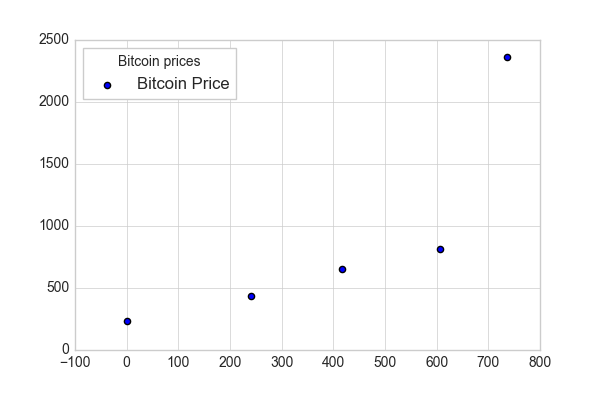

In [102]:
# jouw code opdracht 3

## 5. Voorbeeld oplossingen van de opdrachten
<a id="assignment_solutions"></a>

Shape: (9, 2)
Header:
    Studie_Uren  Cijfer
0            2     5.7
1            3     6.6
2            4     7.3
3            5     7.6
4            6     7.9
Datatset:
    Studie_Uren  Cijfer
0            2     5.7
1            3     6.6
2            4     7.3
3            5     7.6
4            6     7.9
5            7     8.1
6            8     9.0
7            9     9.6
8           10    10.0

Correlation matrix
              Studie_Uren    Cijfer
Studie_Uren     1.000000  0.987797
Cijfer          0.987797  1.000000



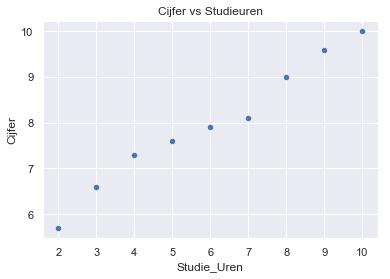

In [103]:
# ###########################################
# Voorbeeld oplossing 
# opdracht 1 - student cijfers en studie-uren
# ###########################################

# project imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()

# Load data
data_folder = './datasets/'
df = pd.read_csv(data_folder + 'Grade_Set_1.csv') 

# toon data in tabel-vorm
print('Shape: {}'.format(df.shape))
print('Header:\n {}'.format(df.head()))  # print de eerste 10 rijen
print ('Datatset:\n {}\n'.format(df))

# Simple scatter plot
df.plot(kind='scatter', 
        x='Studie_Uren', 
        y='Cijfer', 
        title='Cijfer vs Studieuren')

# correlation matrix
print ('Correlation matrix\n {}\n'.format(df.corr()))



#### Conclusies

1. De eenvoudige scatter plot, waarbij langs de x-as het aantal studie-uren staat en langs de y-as het cijfer, laat zien dat het cijfer geleidelijk toeneemt met het aantal bestede studie-uren. Dit impliceert dat er een lineair verband is tussen deze twee variabelen.

2. Als je een correlatie analyse doet (`df.corr()`), dan is er een 98% positief verband tussen de variabelen `Cijfer` en `Studie-uren`. Dit betekent dat er een 98% kans is dat een verandering in het aantal studie-uren leidt tot een verandering in het cijfer.

Model parameters:
	Intercept: 4.967777777777778
	Coefficient: [0.50166667]
	R-squared:  1.0
	Manual prediction (6 hours): 7.977777797777778
	Linear Regression builtin prediction: [7.97777778]


Text(0.5,0,'Studie-uren')

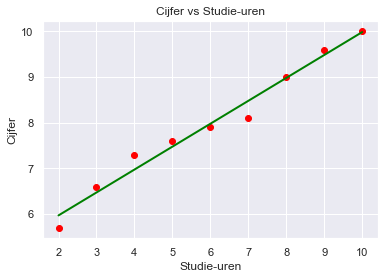

In [104]:
# Prediction model - assignments up from 7.

# importing linear regression function
import sklearn.linear_model as lm

# Create linear regression object
lr = lm.LinearRegression()

# specify independend (feature) and dependent (target) variables
x= df.Studie_Uren[:, np.newaxis] # feature
y= df.Cijfer.values              # target

# Train the model using the training set = all data
lr.fit(x, y)
print ("Model parameters:")
print ("\tIntercept: {}".format(lr.intercept_))
print ("\tCoefficient: {}".format(lr.coef_))

# how good is the model: r-squared
from sklearn.metrics import r2_score

# Using built-in functions
print ("\tR-squared: ", r2_score(df.Cijfer, y))

# manual prediction for a given value of x
print ("\tManual prediction (6 hours):", 4.967777777777778 + 0.50166667*6)

# predict using the built-in function
print ("\tLinear Regression builtin prediction: {}".format(lr.predict(6)))

# plotting fitted line
plt.scatter(x, y,  color='red')
plt.plot(x, lr.predict(x), color='green', linewidth=2)
plt.title('Cijfer vs Studie-uren')
plt.ylabel('Cijfer')
plt.xlabel('Studie-uren')

Door het invullen van de juiste waarden (`m`, `c` en `X=6`) in de vergelijking (`Y = m * X + c`), levert dit op: 4.967777777777778 + 0.50166667*6 = 7.98, wat betekent dat een student die 6 uur studeert de kans heeft om een score van 7,98 (≈8) te behalen.

Merk op dat als X is 0, de waarde van Y is 4.96, wat betekent dat zelfs als de student niet studeert, er een mogelijkheid is dat hij 4,96 (≈5) scoort; dit betekent dat er andere variabelen zijn met een causaliteits-effect op het cijfer, waartoe we momenteel geen toegang hebben.

In [105]:
# ###########################################################
# Assignment Studentresults
# EXTRA: other metrics who can tell you how good the model is:
#    r-squared, mean_absolute_error (MAE), mean_squared_error (RMSE)

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Using built-in functions
print ("R-squared: ", r2_score(df.Cijfer, y))

# add predict value to the data frame
df['Cijfer_Pred'] = lr.predict(x)

# Using built-in functions
print ("Mean Absolute Error: ", mean_absolute_error(df.Cijfer, df.Cijfer_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Cijfer, df.Cijfer_Pred)))

R-squared:  1.0
Mean Absolute Error:  0.16185185185185189
Root Mean Squared Error:  0.20422995995497312


In [109]:
# ################################
# Voorbeeld oplossing 
# opdracht 2 - salaris en ervaring
# ################################

# 2019-09 example from [Morgan] chapter 6 - Regression
# Goal is to create a model that will predict a salary based upon years of experience

# 1. Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    

In [110]:
# 2. Importing the dataset
data_folder = './datasets/'
dataset = pd.read_csv(data_folder + 'Salary_Data.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# explore data: print a few data
# i.e. what data contains X?  What data contains y?
print(dataset.head())
print(X[:5])
print(y[:5])
#print("type X:", type(X))
#print("type y:", type(y))
print(X.shape)
print(y.shape)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
[39343. 46205. 37731. 43525. 39891.]
(30, 1)
(30,)


In [111]:
# Split the dataset into a Training set and a Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Vraag: 
# Welk percentage van de totale dataset 
# is training set en welk percentage is test set?
#print(len(X_train)); print(len(X_test))
#print(len(y_train)); print(len(y_test))

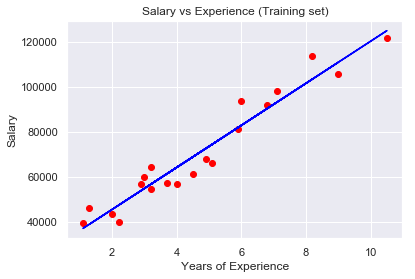

Slope: [9345.94244312]
Intercept: 26816.19224403119


In [112]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print("Slope:", regressor.coef_)
print("Intercept:", regressor.intercept_)

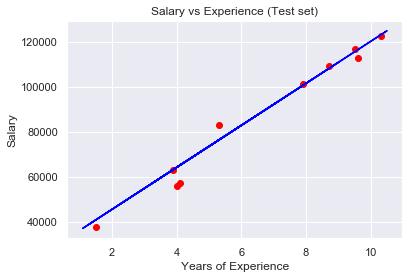

In [113]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [119]:
# Prediction of salary after a certain years of experience:
print("Years of experiences\tSalary")
for i in range(1, 16):
    print("\t{0}\t\t{1}".format(i, regressor.predict(i)))

Years of experiences	Salary
	1		[36162.13468715]
	2		[45508.07713028]
	3		[54854.0195734]
	4		[64199.96201652]
	5		[73545.90445964]
	6		[82891.84690277]
	7		[92237.78934589]
	8		[101583.73178901]
	9		[110929.67423213]
	10		[120275.61667525]
	11		[129621.55911838]
	12		[138967.5015615]
	13		[148313.44400462]
	14		[157659.38644774]
	15		[167005.32889087]


In [120]:
# ################################
# Geen voorbeeld oplossing 
# opdracht 3 - bitcoins
# ################################

## Bijlage: diverse voorbeelden

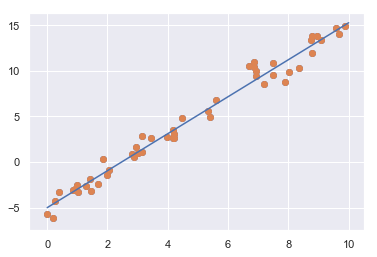

In [61]:
# voorbeeld uit [VanderPlas] chapter 5 - sectie In Depth: Linear Regression
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()
import numpy as np

# genereer een data set
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x,y)

# We gebruiken de LinearRegression van Scikit-Learn 
# om deze gegevens te passen en de best passende lijn te construeren.
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

#### Correlatie en Causaliteit

Hoewel correlatie ons helpt de mate van relatie tussen twee of meer variabelen te bepalen, vertelt het niets over de oorzaak en de relatie met de consequenties. 

Een hoge mate van correlatie hoeft niet altijd te betekenen dat er een relatie tussen oorzaak en gevolg tussen de variabelen bestaat. 

Merk op dat correlatie niet causaliteit impliceert, hoewel het bestaan van causaliteit altijd correlatie impliceert. Laten we dit beter begrijpen met een aantal voorbeelden.

1. Aanwezigheid van vele brandweermannen bij een brandgeval betekent dat het vuur groot is, maar niet dat het vuur wordt veroorzaakt door brandweerlieden.

2. Als iemand slaapt met zijn schoenen aan, krijgt hij waarschijnlijk hoofdpijn. Dit kan te wijten zijn aan teveel alcohol.

#### Linear regression

**Model**: y = m.X + c

**Doel**: bepalen model parameters `m` (=hellingshoek) en `b` (=interceptie) zodanig dat de afstand van de lijn van elk punt tot het betreffende meetpunt minimaal is.

**Figuur bepalen hellingshoek met minimale fout**
![A434293_1_En_3_Fig5_HTML](images/A434293_1_En_3_Fig5_HTML.jpg)

De fout kan positief of negatief zijn op basis van de locatie van de helling, waardoor als we een eenvoudige som van alle fouten nemen, deze nul kan zijn. Dus we moeten de fout kwadrateren om de negativiteit kwijt te raken en deze kwadratische fouten bij elkaar optellen. Daarom wordt deze lijn ook wel de kleinste-kwadratenlijn genoemd.

De lijn-vergelijking wordt gegeven door `y = mX + c`, waarbij `y` de voorspelde waarde voor een gegeven `X`-waarde is. Samen bepalen de helling `m` en de interceptie `c` de lineaire relatie tussen de twee variabelen. 

We kunnen de lin-vergelijking gebruiken om het cijfer voor een bepaald aantal uren studie te voorspellen. In dit geval is het *cijfer* de afhankelijke variabele, aangeduid met 'Y' en het *aantal studie-uren* de onafhankelijke variabele of voorspeller, aangeduid met 'X'. 

> Voorbeeld: stel dat een student van plan is om totaal 6 uur te besteden aan de voorbereiding op de toets. Door eenvoudig een verbindingslijn van de x-as en de y-as naar de lijn te tekenen, kom je tot een voorspelling dat de student een 8 kan scoren.

We gebruiken de lineaire regressie uit de scikit-learn-bibliotheek om de waarden van `m` (x's coëfficiënt) en `c` (intercept) te vinden.

In [62]:
# EXAMPLE: multiple/polynomial regression
# 2019-0903 new, example from [Morgan] chapter 6 - Regression
# global understanding

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    

# Importing the dataset
data_folder = './datasets/'
dataset = pd.read_csv(data_folder + '50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#Let’s look at the data:
print(dataset.head())

''' analyzing the data:
* multiple features: R&D Spend, Administration, Marketing Spend,....
* goal: to discover a relationship between the independent variables and the target (Profit)
* 'State': data is text, not a number - how to deal with ths kind of data?
 -> transforming categorical data into numerical data
'''
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print('\nEncoded State\n X[:5]=', X[:5])
''' 
created 'dummy' variables:
3.5, New York
2.0, California
6.7, Florida

is transformed into:
3.5, 1, 0, 0
2.0, 0, 1, 0
6.7, 0, 0, 1

So, column for 'State' became equivalant to 3 columns:
     New York  California   Florida
3.5     1          0           0
2.0     0          1           0
6.7     0          0           1

However, there's an extra variable that could have been removed because 
it can be predicted from the others. I.e. when the columns for New York and California
are zero (0), automaticlaly we know it's Florida. You can already know which 'State' 
it is even with just 2 variables
'''
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
print('\nAvoiding dummy variable trap\n X[:5]=', X[:5])  #Peter added so we can see: no categorical data anymore

# split the dataset into a Training Set and a Test set
# 80% Training Set, 20% Test Set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# We can then create a regressor and “fit the line” (and use that line on Test Set):
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicted Profit values on the X_test
y_pred = regressor.predict(X_test)
print('\ny_pred=', y_pred) # Peter added

'''
However, it that all there is? Are all variables (R&D Spend, Administration, 
Marketing Spend, State) responsible for the target (Profit)?

It turns out there are additional steps needed to create a better model and predictors.

One example is to use Backward Elimination: eliminating variables one-by-one until 
there's one or two left, so we'll know which of the variables is making the biggest 
contribution to the results.  
'''
print('\n')

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Encoded State
 X[:5]= [[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]]

Avoiding dummy variable trap
 X[:5]= [[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.00

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


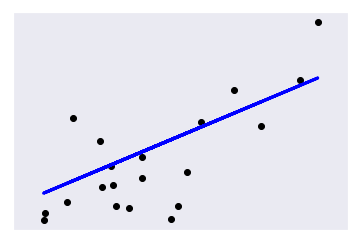

In [63]:
# Example from [Morgan] chapter Supervised & Unsupervised Learning, 
#                       section Linear Regression
# Source:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# Code source: Jaques Grobler
# License: BSD 3 clause
# 2018-0903 PP some minor changes

import matplotlib.pyplot as plt
%matplotlib inline    

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
#Peter addded: description of the diabetes dataset
#print(diabetes.DESCR)

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()